In [1]:
import sys
!{sys.executable} -m pip install nlp_rake
!{sys.executable} -m pip install wordcloud

In [16]:
url = 'https://en.wikipedia.org/wiki/Hurricane_Harvey'

In [17]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Hurricane Harvey - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [27]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

  Hurricane Harvey - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Meteorological history 2 Preparations Toggle Preparations subsection 2.1 Caribbean and Latin America 2.2 United States 2.2.1 Texas 2.2.2 Louisiana 2.2.3 Video briefings by officials 3 Impacts in the Caribbean and Latin America 4 Impacts in the United States Toggle Impacts in the United States subsection 4.1 Texas 4.1.1 Landfall area 4.1.2 Houston metropolitan area flooding 4.1.3 Deep East Texas and Beaumont to Port Arthur area 4.2 Louisiana 4.3 Elsewhere 4.4 Energy production 4.5 Sports 5 Aftermath Toggle Aftermath subsection 5.1 Texas 5.2 Eco

In [29]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=5,min_chars=10)
res = extractor.apply(text)
res

[('hurricane harvey', 4.0),
 ('made landfall', 4.0),
 ('major hurricane', 4.0),
 ('united states', 4.0),
 ('saint vincent', 4.0),
 ('rio grande', 4.0),
 ('port mansfield', 4.0),
 ('high island', 4.0),
 ('grand isle', 4.0),
 ('ef1 tornado', 4.0),
 ('harris county', 4.0),
 ('climate change', 4.0),
 ('york times', 4.0),
 ('weather channel', 4.0),
 ('houston chronicle', 4.0),
 ('national centers', 4.0),
 ('environmental information', 4.0),
 ('cite report', 4.0),
 ('washington post', 3.8),
 ('september 1', 1.0),
 ('september 3', 1.0),
 ('additionally', 1.0),
 ('september 2', 1.0),
 ('september 8', 1.0),
 ('september 10', 1.0),
 ('september 4', 1.0)]

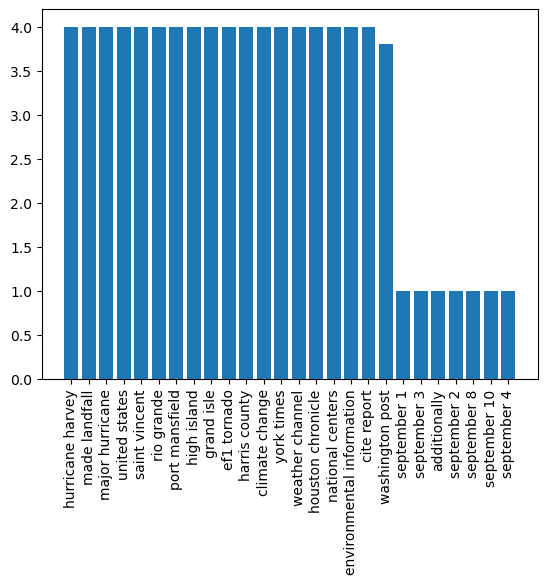

In [30]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

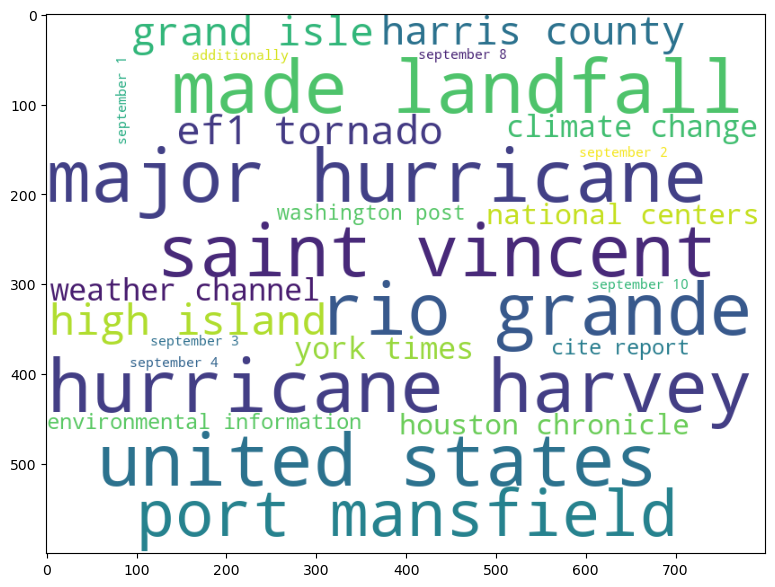

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

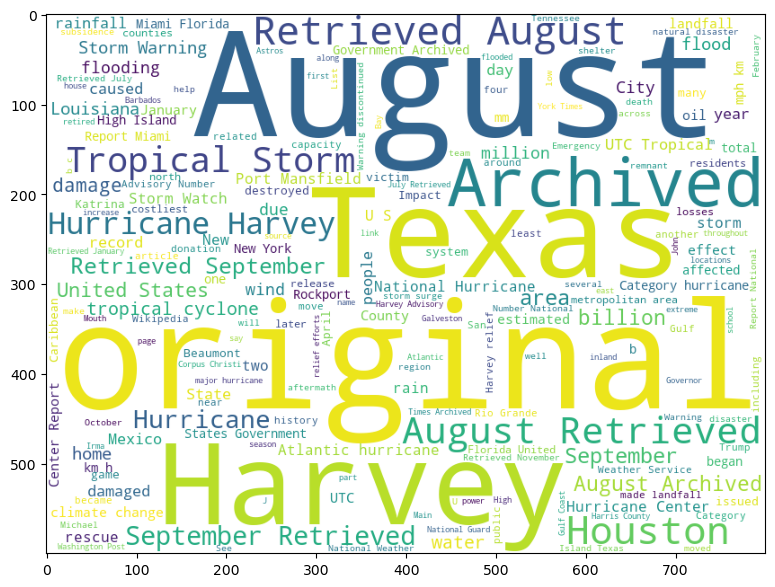

In [32]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))


In [33]:
wc.generate(text).to_file('ds_wordcloud.png')

In [42]:
text1='The nowadays strategic management of an enterprise is determined by various criteria, one of which, increasingly, is the interaction with the environment. Advanced business analytics based on artificial intelligence allows organizations to achieve business goals by optimizing the use of resource while reducing the negative impact on the environment. This requires the improvement of existing and the invention of new tools for creating, sharing and consuming data, which can be compared with digital evolution. As a result of this evolution, new creators and consumers of data appear. Data, its creators and consumers, is a network of interconnected elements, part of a data ecosystem that is constantly evolving. Obviously, the ecosystem includes data that needs to be integrated from disparate sources; various types of analysis and skills to obtain information; actions in accordance with the acquired knowledge;as well as tools, applications and infrastructure for storing, processing and distributing data, depending on the purpose. Such multidimensionality makes the training of data-related specialists a rather complicated process. There is a need to constantly search for such key skills and knowledge that would make it easy to adapt to the new qualities and properties of the data ecosystem. The purpose of this work is to analyze the properties of the data ecosystem and highlight the key aspects of methodology for data science with respect to environmental sustainability. The results of the study are illustrated by the case study on the optimal taxi dispatching.'

In [46]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=2,min_chars=3)
res = extractor.apply(text1)
res

[('data ecosystem', 3.75),
 ('data', 1.75),
 ('environment', 1.0),
 ('tools', 1.0),
 ('creators', 1.0),
 ('consumers', 1.0),
 ('purpose', 1.0),
 ('properties', 1.0)]

In [38]:
type(text1)

str